# **EECS 3401 Final Project: Understanding Heart Disease Risk**
### Group Members: Deep Patel, Yukta Bhutani, Abdul Wasay Faizan
#### Original Dataset Source: [link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=2022)
#### Modified Dataset Source: [link](https://github.com/Deep26053/EECS3401_Heart/blob/main/heart_2022_with_nans.csv)
### Project Description: 
This project aims to analyze a comprehensive dataset related to heart disease risk factors sourced from the Centers for Disease Control and Prevention (CDC). The dataset encompasses survey data from over 400,000 adults collected in 2022, focusing on key indicators associated with heart disease prevalence.

### Attributes for the heart disease dataset:

1. Age: Age of the respondent.
2. Gender: Gender of the respondent.
3. Race: Race of the respondent.
4. HighBloodPressure: Presence of high blood pressure (binary: "Yes" or "No").
5. HighCholesterol: Presence of high cholesterol (binary: "Yes" or "No").
6. SmokingStatus: Smoking status of the respondent.
7. DiabetesStatus: Diabetes status of the respondent.
8. Obesity: Obesity status of the respondent (measured by BMI).
9. PhysicalActivity: Level of physical activity.
10. AlcoholConsumption: Level of alcohol consumption.
11. OtherMedicalConditions: Presence of other medical conditions.
12. FamilyHistory: Family history of heart disease (binary: "Yes" or "No").
13. MedicationUsage: Usage of medications for heart disease or related conditions.
14. StressLevel: Level of stress reported by the respondent.
15. Diet: Dietary habits of the respondent.
16. ExerciseRoutine: Regularity of exercise routines.
17. SleepQuality: Quality of sleep reported by the respondent.
18. SocioeconomicStatus: Socioeconomic status of the respondent.
19. EducationLevel: Level of education attained by the respondent.
20. AccessToHealthcare: Access to healthcare facilities and services.
21. GeographicLocation: Geographic location of the respondent.
22. DateOfSurvey: Date when the survey was conducted.
23. HadHeartAttack: Presence of heart disease (binary: "Yes" or "No").

# 1. Frame the Problem:

### Task: 
Predict the likelihood of heart disease based on demographic and health-related variables using the Heart Disease dataset.

### Key Questions:
1. What are the demographic and health-related variables associated with heart disease risk?
2. How do factors such as age, gender, blood pressure, cholesterol levels, smoking status, diabetes status, obesity, physical activity, and alcohol consumption impact the likelihood of heart disease?
3. What is the distribution of heart disease cases among different demographic groups?
4. Can we identify patterns or correlations between variables and heart disease prevalence?
5. Which machine learning algorithm provides the most accurate predictions for heart disease likelihood?

- **Supervised Learning:** Since the dataset includes labelled data (e.g., presence or absence of heart disease), it is a supervised learning problem.
- **Classification Task:** The objective is to predict whether an individual is at risk of heart disease (binary classification).
- **Batch Learning:** The dataset represents a finite set of data collected at a specific time, making batch learning suitable for model training. There is no continuous flow of data coming into the system, and there is no need to adjust to changing data rapidly.
This framing of the problem provides clarity on the type of learning approach, the nature of the prediction task, and the appropriate learning technique to use for developing the heart disease prediction model.


# Look at the Big Picture:
The model's output (prediction of an individual's likelihood of heart disease) will be used as one of many signals in a broader healthcare system. This downstream system will aid healthcare professionals in making informed decisions regarding patient care, such as recommending preventive measures, lifestyle modifications, or medical interventions.

## Key Analyses:
- **Distribution of Heart Disease Risk Factors:**
Explored the prevalence and distribution of heart disease risk factors including blood pressure, cholesterol levels, smoking status, diabetes status, obesity, physical activity levels, and alcohol consumption to identify common patterns and variations.
- **Impact of Demographic Factors on Heart Disease Risk:**
Investigated the relationship between demographic factors (age, gender, ethnicity) and heart disease prevalence to identify any significant associations or disparities.
- **Correlation between Risk Factors and Heart Disease:**
Identified correlations between variables such as blood pressure, cholesterol levels, smoking status, and heart disease to understand their impact on heart disease risk.
- **Feature Importance Analysis:**
This analysis can provide insights into which demographic and health-related factors have the greatest impact on heart disease risk.

### Impact: 
By accurately predicting the likelihood of heart disease, the model can contribute to reducing the burden of cardiovascular disease, improving patient outcomes, and reducing healthcare costs associated with preventable heart-related complications.


In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 2. Load Dataset:
Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series.
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [3]:
heart_data = pd.read_csv('heart_2022_with_nans.csv') # Read dataset from the CSV file into a DataFrame

In [4]:
heart_data.head() # Use head() to look at the first 5 rows

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
heart_data.describe() # Use describe() method to see a summary of the numerical attributes

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [6]:
heart_data.info() # Use info() to get a quick description of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [7]:
heart_data.shape #Determine the shape of the dataset

(445132, 40)

# 2. Cleaning Dataset

In [ ]:
heart_data["PhysicalHealthDays"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadHeartAttack"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadAngina"].replace(['Yes', 'No'], [1, 0],inplace = True)
heart_data["HadStroke"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadAsthma"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadCOPD"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadDepressiveDisorder"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadKidneyDisease"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadArthritis"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["DeafOrHardOfHearing"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["BlindOrVisionDifficulty"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["DifficultyConcentrating"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["DifficultyWalking"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["ChestScan"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["AlcoholDrinkers"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["PhysicalActivities"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HighRiskLastYear"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadSkinCancer"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["Sex"].replace(['Female', 'Male'], [0, 1],inplace = True)

In [9]:

smoker_mapping = {
    'Never smoked': 0,
    'Current smoker - now smokes some days': 1,
    'Former smoker': 1,
    'Current smoker - now smokes every day': 1
}
diabeties_mapping = {'Yes':1, 'No':0, 'No, pre-diabetes or borderline diabetes':1,
 'Yes, but only during pregnancy (female)':0}

# Apply mapping to the entire 'SmokerStatus' column
heart_data['SmokerStatus'] = heart_data['SmokerStatus'].map(smoker_mapping)
heart_data['HadDiabetes'] = heart_data['HadDiabetes'].map(diabeties_mapping)
heart_data['SmokerStatus'].head(20)
heart_data['HadDiabetes'].head(20)



0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     0.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
Name: HadDiabetes, dtype: float64

In [10]:
heart_data.drop(columns=['PhysicalHealthDays', 'MentalHealthDays', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 
                         'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 
                         'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking','ChestScan', 
                        'HeightInMeters','State', 'LastCheckupTime', 
                        'RemovedTeeth', 'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage', 'HIVTesting', 
                        'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'CovidPos'],inplace=True)      
     

In [11]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    445132 non-null  int64  
 1   GeneralHealth          443934 non-null  object 
 2   PhysicalActivities     444039 non-null  float64
 3   SleepHours             439679 non-null  float64
 4   HadHeartAttack         442067 non-null  float64
 5   HadAngina              440727 non-null  float64
 6   HadStroke              443575 non-null  float64
 7   HadDiabetes            444045 non-null  float64
 8   SmokerStatus           409670 non-null  float64
 9   RaceEthnicityCategory  431075 non-null  object 
 10  AgeCategory            436053 non-null  object 
 11  WeightInKilograms      403054 non-null  float64
 12  BMI                    396326 non-null  float64
 13  AlcoholDrinkers        398558 non-null  float64
 14  HighRiskLastYear       394509 non-nu

In [12]:
heart_data.dropna(subset=['AgeCategory', 'RaceEthnicityCategory', 'HadDiabetes', 'GeneralHealth'], inplace=True)

In [ ]:
median_value = heart_data['AlcoholDrinkers'].median()
heart_data['AlcoholDrinkers'].fillna(median_value, inplace=True)

median_value = heart_data['BMI'].median()
heart_data['BMI'].fillna(median_value, inplace=True)

median_value = heart_data['SmokerStatus'].median()
heart_data['SmokerStatus'].fillna(median_value, inplace=True)

median_value = heart_data['HadStroke'].median()
heart_data['HadStroke'].fillna(median_value, inplace=True)

median_value = heart_data['HadAngina'].median()
heart_data['HadAngina'].fillna(median_value, inplace=True)

median_value = heart_data['HadHeartAttack'].median()
heart_data['HadHeartAttack'].fillna(median_value, inplace=True)

median_value = heart_data['SleepHours'].median()
heart_data['SleepHours'].fillna(median_value, inplace=True)

median_value = heart_data['HighRiskLastYear'].median()
heart_data['HighRiskLastYear'].fillna(median_value, inplace=True)

median_value = heart_data['WeightInKilograms'].median()
heart_data['WeightInKilograms'].fillna(median_value, inplace=True)

median_value = heart_data['PhysicalActivities'].median()
heart_data['PhysicalActivities'].fillna(median_value, inplace=True)

In [17]:
heart_data['HeartProblem'] = heart_data.apply(lambda row: ''.join(map(str, row[['HadHeartAttack', 'HadAngina', 'HadStroke']])), axis=1)

heart_mapping = {'0.00.00.0':0, '1.00.01.0':1, '1.00.00.0':1, '0.01.00.0':1, '0.01.01.0':1, '1.01.01.0':1,
 '0.00.01.0':1, '1.01.00.0':1}

# Apply mapping to the entire 'HeartProblem' column
heart_data['HeartProblem'] = heart_data['HeartProblem'].map(heart_mapping)
heart_data['HeartProblem'].head(20)

0     0
1     0
2     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
17    0
18    1
19    0
20    0
21    0
Name: HeartProblem, dtype: int64

In [35]:
heart_data.drop(columns=['HadHeartAttack', 'HadAngina', 'HadStroke'], inplace=True)

In [36]:
heart_data.isnull().sum()

Sex                      0
GeneralHealth            0
PhysicalActivities       0
SleepHours               0
HadDiabetes              0
SmokerStatus             0
RaceEthnicityCategory    0
AgeCategory              0
WeightInKilograms        0
BMI                      0
AlcoholDrinkers          0
HighRiskLastYear         0
HeartProblem             0
dtype: int64

# **3. Explore and visualize the data to gain insights**

**3.1 Distribution of Heart Disease Risk Factors:**

<Axes: >

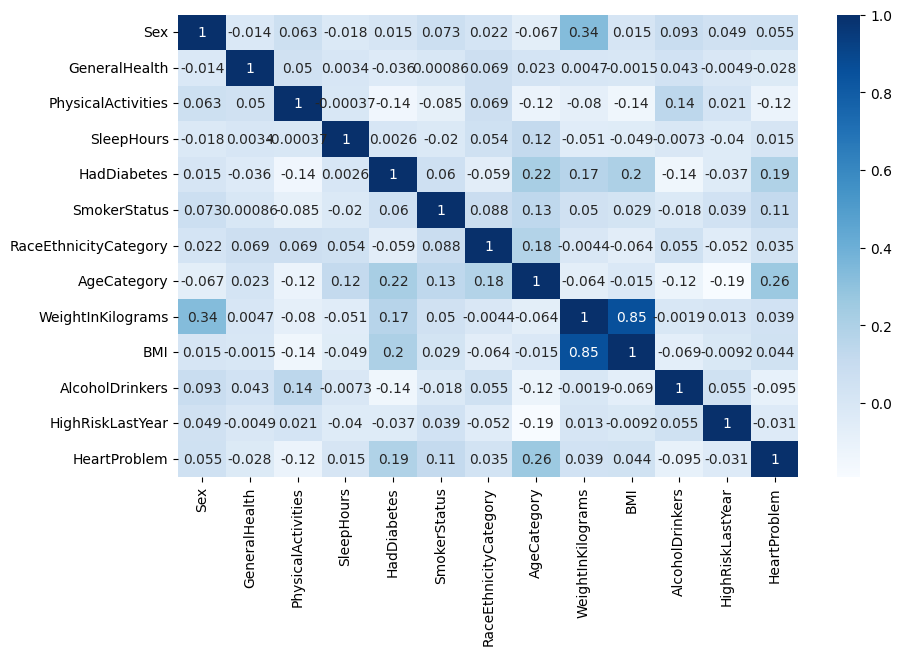

In [99]:
numeric=heart_data.select_dtypes(exclude='O')
plt.figure(figsize = (10,6))
sns.heatmap(data=numeric.corr(),annot=True,cmap ='Blues')

**3.2 Impact of Demographic Factors on Heart Disease Risk:**

C:\Users\patel\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


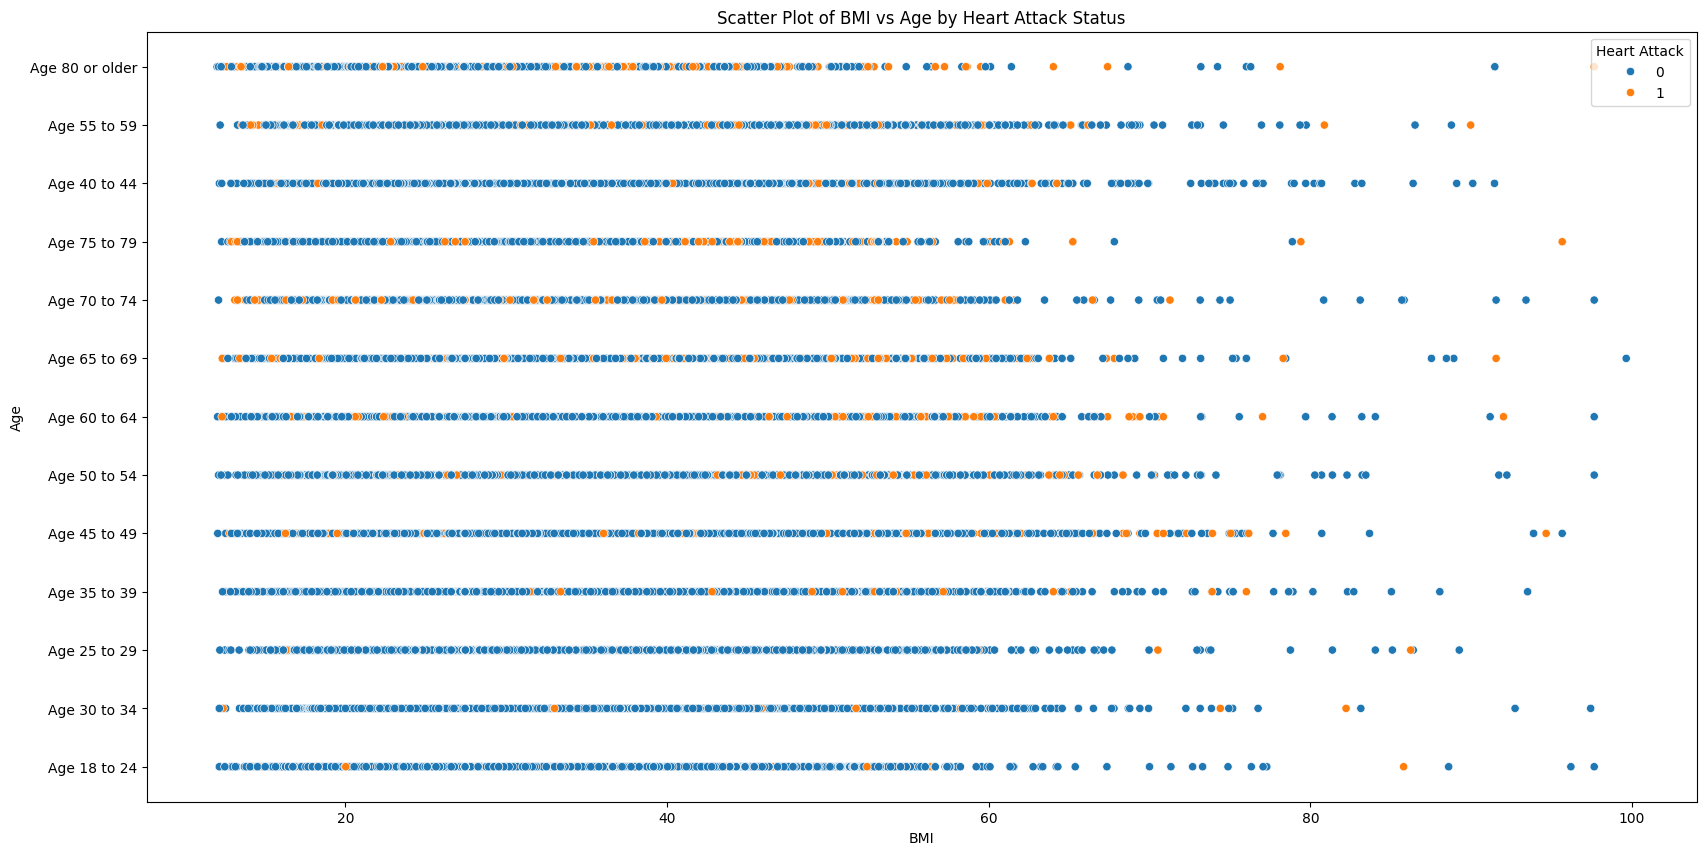

In [37]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=heart_data, x='BMI', y='AgeCategory', hue='HeartProblem')
plt.title('Scatter Plot of BMI vs Age by Heart Attack Status')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend(title='Heart Attack')
plt.show()

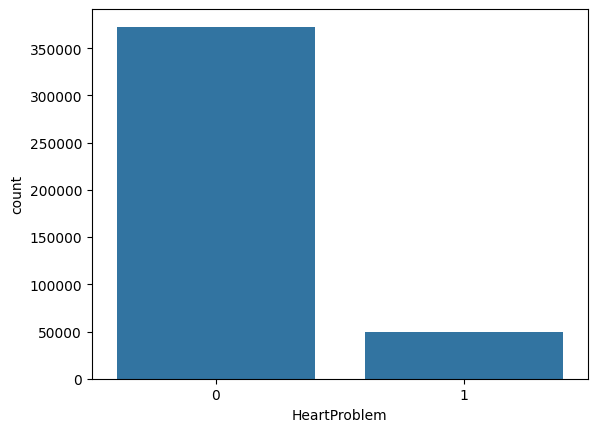

In [106]:
sns.countplot(x = 'HeartProblem', data = heart_data)
plt.show()

In [107]:

categorical = heart_data.select_dtypes(include = 'O')
categorical.columns

Index([], dtype='object')

In [108]:
i = 1
plt.figure(figsize = (30,25))
for feature in categorical:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartProblem' , data = heart_data)
    i += 1

<Figure size 3000x2500 with 0 Axes>

# **4. Prepare the data for Machine Learning Algorithms:**

In [59]:
from sklearn.calibration import LabelEncoder


le=LabelEncoder()
i = 1
for feature in categorical:
    heart_data[feature]=le.fit_transform(heart_data[feature])
    i += 1
    print(feature)

GeneralHealth
RaceEthnicityCategory
AgeCategory


In [60]:
heart_data.dtypes

Sex                        int64
GeneralHealth              int32
PhysicalActivities       float64
SleepHours               float64
HadDiabetes              float64
SmokerStatus             float64
RaceEthnicityCategory      int32
AgeCategory                int32
WeightInKilograms        float64
BMI                      float64
AlcoholDrinkers          float64
HighRiskLastYear         float64
HeartProblem               int64
dtype: object

### **4.1. Train-test split:**

In [61]:
from sklearn.model_selection import train_test_split


X=heart_data.drop('HeartProblem',axis=1)
y=heart_data['HeartProblem']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=heart_data['HeartProblem'])

### **4.2. Scaling:**

In [62]:
from sklearn.discriminant_analysis import StandardScaler


ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Logistic Regression:

In [63]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [64]:
acc=log_reg.score(X_train,y_train)
acc

0.8819314761598949

In [65]:
y_pred = log_reg.predict(X_test)

In [66]:
log_reg.coef_,log_reg.intercept_

(array([[ 0.26083068, -0.09185026, -0.17137709, -0.06575863,  0.2598092 ,
          0.22088107,  0.00851624,  1.00910715, -0.05513839,  0.14375563,
         -0.14242335,  0.05839182]]),
 array([-2.52601942]))

In [67]:
column_labels = X.columns.tolist()
coef = log_reg.coef_.squeeze().tolist()
intercept=log_reg.intercept_.squeeze().tolist()

In [68]:
labels_coef = list(zip(column_labels, coef))
for i in labels_coef:
    print(i,intercept)

('Sex', 0.26083068107495483) -2.5260194177770043
('GeneralHealth', -0.09185025883886863) -2.5260194177770043
('PhysicalActivities', -0.1713770861493402) -2.5260194177770043
('SleepHours', -0.06575862569543058) -2.5260194177770043
('HadDiabetes', 0.25980920358687026) -2.5260194177770043
('SmokerStatus', 0.22088107316876915) -2.5260194177770043
('RaceEthnicityCategory', 0.008516239578500211) -2.5260194177770043
('AgeCategory', 1.009107152481717) -2.5260194177770043
('WeightInKilograms', -0.05513839447357347) -2.5260194177770043
('BMI', 0.1437556291295832) -2.5260194177770043
('AlcoholDrinkers', -0.14242335346334484) -2.5260194177770043
('HighRiskLastYear', 0.058391818341922086) -2.5260194177770043


In [69]:
accuracy=log_reg.score(X_test,y_test)
accuracy

0.881834862385321

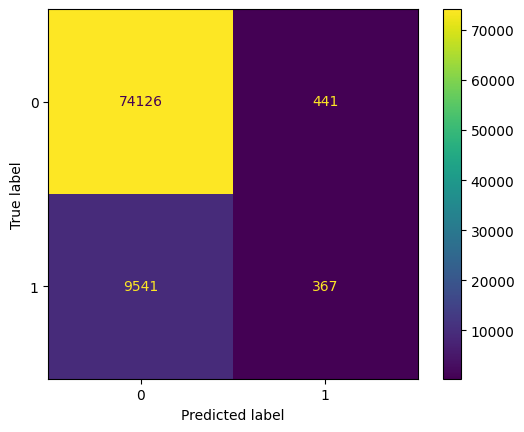

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [71]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     74567
           1       0.45      0.04      0.07      9908

    accuracy                           0.88     84475
   macro avg       0.67      0.52      0.50     84475
weighted avg       0.84      0.88      0.84     84475



## Random Forest Classifier:

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
from sklearn.metrics import classification_report, accuracy_score
rf_predictions = rf_classifier.predict(X_test)
# Display classification report
print(classification_report(y_test, rf_predictions, zero_division=0))
print(accuracy_score(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     74567
           1       0.37      0.15      0.21      9908

    accuracy                           0.87     84475
   macro avg       0.63      0.56      0.57     84475
weighted avg       0.83      0.87      0.85     84475

0.8702337969813554


<Figure size 800x600 with 0 Axes>

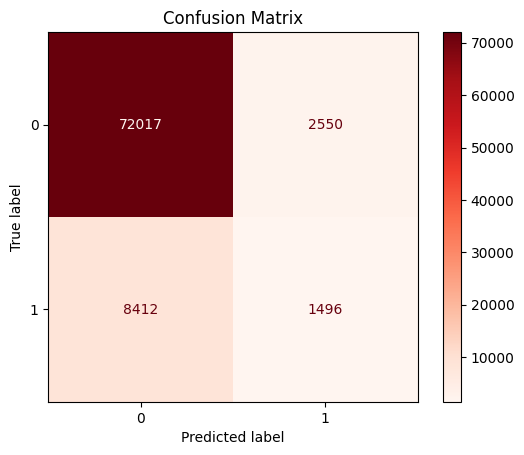

In [76]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Reds', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

## XGBoost Classifier:

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(random_state=42)  # Initialize the XGBClassifier with random_state
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [92]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8838354542764132


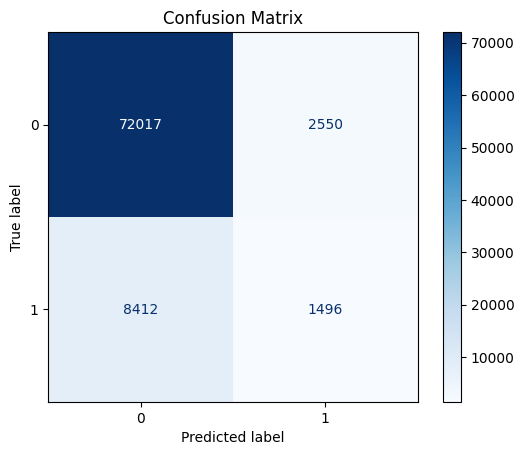

In [93]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### **Conclusion: Best-Performing Algorithm: XGBoost classifier**

In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier


def evaluate_models(X, y):
    results = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('XGBoost', SGDClassifier())
    ]

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((name, accuracy, precision, recall, f1))

    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='lightblue')
    display(df_styled)

In [79]:
evaluate_models(X,y)

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.882297,0.447172,0.042564,0.077729
1,Decision Tree,0.827511,0.261190,0.262597,0.261891
2,Random Forest,0.870459,0.366399,0.153088,0.215949
3,XGBoost,0.883468,0.500000,0.003048,0.006058


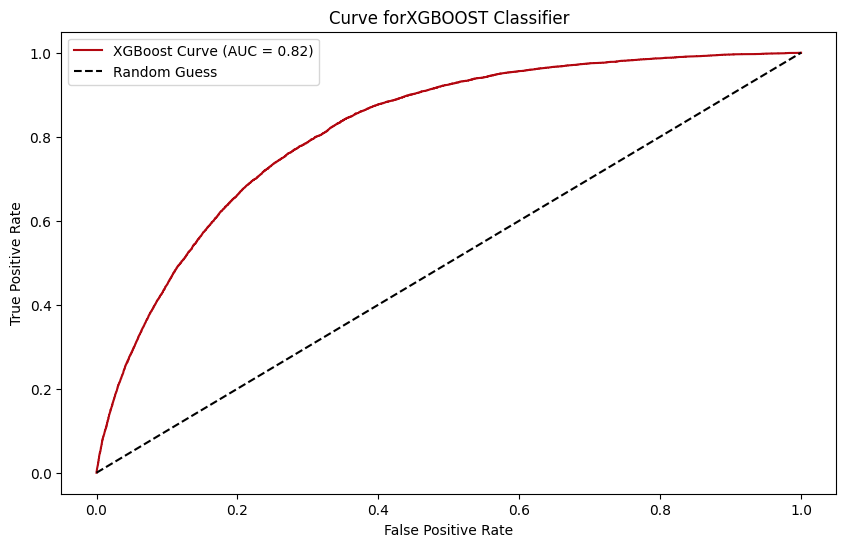

In [98]:
# Graph 1 and small description
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to binary format
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
y_scores_rf = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='#b20710', label=f'XGBoost Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curve forXGBOOST Classifier')
plt.legend()
plt.show()

The XGBoost curve evaluates the performance of a XGBOOST classifier. It plots the true positive rate against the false positive rate at varying thresholds. The red XGBOOST curve significantly outperforms the random guess (black diagonal) line with an AUC of 82%. This AUC demonstrates the XGBoost model's effectiveness at minimizing false positives and detecting true positives.

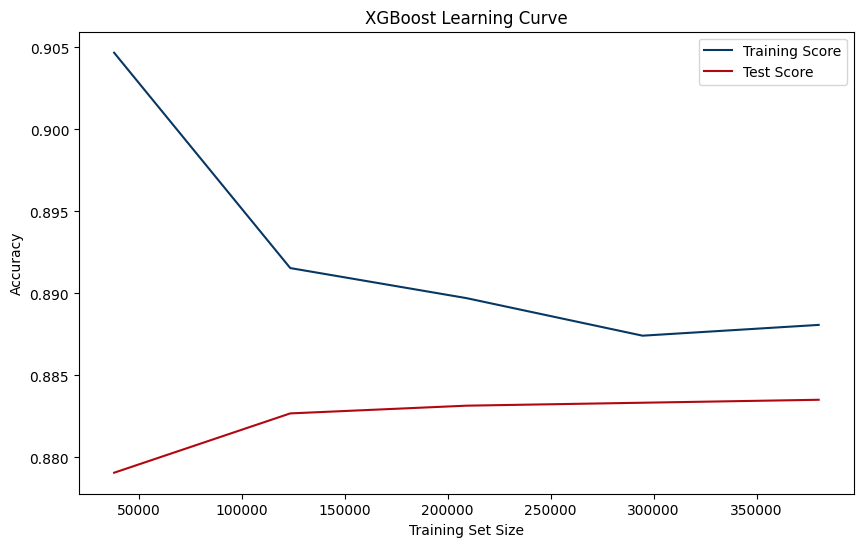

In [97]:
# Graph 2 and small description
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color = "#073763")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score', color = "#b20710")
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()

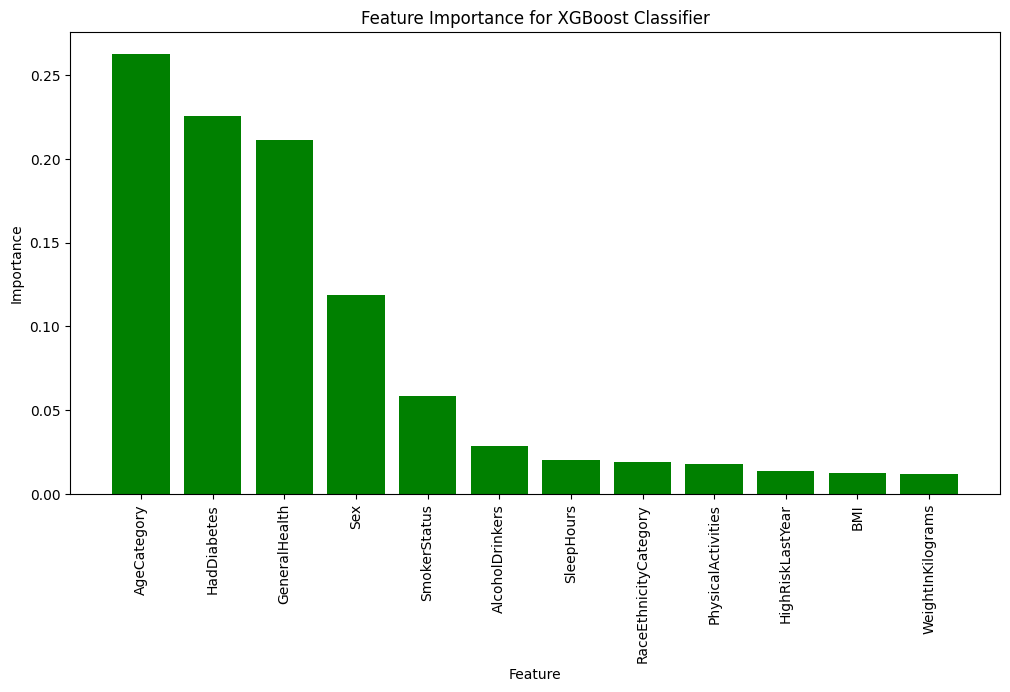

In [96]:
# Graph 3 and small description

features = X.columns
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center', color='Green')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for XGBoost Classifier')
plt.show()